### Evaluation of the dataset

In [1]:
import numpy as np
import os
import json
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt


In [1]:
from pathlib import Path

jsonl_dir = Path("../dataset/final_dataset/")  

total_files = 0
total_lines = 0
total_size_bytes = 0

for file in jsonl_dir.rglob("*.jsonl"): 
    if ".ipynb_checkpoints" in file.parts:
        continue
        
    total_files += 1
    total_size_bytes += file.stat().st_size
    with file.open("r", encoding="utf-8") as f:
        total_lines += sum(1 for _ in f)

print(f"📂 Total JSONL files: {total_files}")
print(f"📄 Total JSON objects (lines): {total_lines}")
print(f"📦 Total size: {total_size_bytes / (1024 ** 2):.2f} MB")


📂 Total JSONL files: 1
📄 Total JSON objects (lines): 216216
📦 Total size: 3292.45 MB


In [2]:
import json
from pathlib import Path

jsonl_dir = Path("../dataset/final_dataset")  

required_input_keys = {
    "id", "timestamp", "query", "conversation_summary",
    "handler_registry", "copilot_id", "thread_id"
}

required_output_keys = {
    "select_handler_type", "handler_name", "server_name", "tool_name",
    "copilot_id", "missing_fields", "optional_suggestions", "suggested_payload",
    "confidence", "reasoning", "chain_of_thought", "workspace_preference_override"
}

required_handler_keys = {"mcp_tools", "worker_agents", "llm_handlers", "rag_handlers"}

missing_summary = []

for file in jsonl_dir.glob("*.jsonl"):
    if ".ipynb_checkpoints" in file.parts:
        continue  

    print(f"📄 Processing: {file}") 
    
    with file.open("r", encoding="utf-8") as f:
        for idx, line in enumerate(f, 1):
            try:
                obj = json.loads(line)
                missing = {"file": file.name, "line": idx, "missing_sections": []}

                if "input" not in obj:
                    missing["missing_sections"].append("input")
                if "output" not in obj:
                    missing["missing_sections"].append("output")

                if "input" in obj:
                    input_obj = obj["input"]
                    missing_input_keys = required_input_keys - input_obj.keys()
                    if missing_input_keys:
                        missing["missing_sections"].append(f"input: {sorted(missing_input_keys)}")

                    if "handler_registry" in input_obj and isinstance(input_obj["handler_registry"], dict):
                        handler_obj = input_obj["handler_registry"]
                        missing_handler_keys = required_handler_keys - handler_obj.keys()
                        if missing_handler_keys:
                            missing["missing_sections"].append(f"handler_registry: missing keys {sorted(missing_handler_keys)}")
                        else:
                            for hk in required_handler_keys:
                                if handler_obj[hk] is None:
                                    missing["missing_sections"].append(f"handler_registry: '{hk}' is null")
                    else:
                        missing["missing_sections"].append("handler_registry: not a valid dict")

                # Output keys
                if "output" in obj:
                    output_obj = obj["output"]
                    missing_output_keys = required_output_keys - output_obj.keys()
                    if missing_output_keys:
                        print("missed datapoint :", obj)
                        missing["missing_sections"].append(f"output: {sorted(missing_output_keys)}")

                if missing["missing_sections"]:
                    missing_summary.append(missing)

            except json.JSONDecodeError:
                print(f"⚠️ Skipped invalid JSON at {file.name}, line {idx}")

# ✅ Final report
if not missing_summary:
    print("✅ All records contain required fields and valid handler registry structure.")
else:
    print(f"❌ {len(missing_summary)} records have issues:\n")
    for miss in missing_summary[:10]:  
        print(miss)


✅ All records contain required fields and valid handler registry structure.


#### Remove `thread_,id` and `copilot__id` and replace with correct schemas

In [25]:
from tempfile import NamedTemporaryFile
import shutil

# Path to the file you want to fix
file_to_fix = jsonl_dir / "final_dataset.jsonl"

temp_file = NamedTemporaryFile(mode="w", delete=False, encoding="utf-8")

with file_to_fix.open("r", encoding="utf-8") as infile, open(temp_file.name, "w", encoding="utf-8") as outfile:
    for line in infile:
        try:
            obj = json.loads(line)

            if "input" in obj:
                if "thread_,id" in obj["input"]:
                    obj["input"]["thread_id"] = obj["input"].pop("thread_,id")
                if "copilot__id" in obj["input"]:
                    obj["input"]["copilot_id"] = obj["input"].pop("copilot__id")

            if "output" in obj:
                if "copilot__id" in obj["output"]:
                    obj["output"]["copilot_id"] = obj["output"].pop("copilot__id")

            outfile.write(json.dumps(obj, ensure_ascii=False) + "\n")

        except json.JSONDecodeError:
            outfile.write(line) 

shutil.move(temp_file.name, file_to_fix)

print(f"✅ Fixed key names in {file_to_fix.name}")


✅ Fixed key names in final_dataset.jsonl


In [64]:
import json
from pathlib import Path

jsonl_dir = Path("../dataset/batches")  

required_input_keys = {
    "id", "timestamp", "query", "conversation_summary",
    "handler_registry", "copilot_id", "thread_id"
}

required_output_keys = {
    "select_handler_type", "handler_name", "server_name", "tool_name",
    "copilot_id", "missing_fields", "optional_suggestions", "suggested_payload",
    "confidence", "reasoning", "chain_of_thought", "workspace_preference_override"
}

required_handler_keys = {"mcp_tools", "worker_agents", "llm_handlers", "rag_handlers"}

missing_summary = []

for file in jsonl_dir.glob("*.jsonl"):
    if ".ipynb_checkpoints" in file.parts:
        continue  

    print(f"📄 Processing: {file}") 
    
    with file.open("r", encoding="utf-8") as f:
        for idx, line in enumerate(f, 1):
            try:
                obj = json.loads(line)
                missing = {"file": file.name, "line": idx, "missing_sections": []}

                if "input" not in obj:
                    missing["missing_sections"].append("input")
                if "output" not in obj:
                    missing["missing_sections"].append("output")

                if "input" in obj:
                    input_obj = obj["input"]
                    missing_input_keys = required_input_keys - input_obj.keys()
                    if missing_input_keys:
                        print('444444444', input_obj.keys())
                        missing["missing_sections"].append(f"input: {sorted(missing_input_keys)}")

                    if "handler_registry" in input_obj and isinstance(input_obj["handler_registry"], dict):
                        handler_obj = input_obj["handler_registry"]
                        missing_handler_keys = required_handler_keys - handler_obj.keys()
                        if missing_handler_keys:
                            missing["missing_sections"].append(f"handler_registry: missing keys {sorted(missing_handler_keys)}")
                        else:
                            for hk in required_handler_keys:
                                if handler_obj[hk] is None:
                                    missing["missing_sections"].append(f"handler_registry: '{hk}' is null")
                    else:
                        missing["missing_sections"].append("handler_registry: not a valid dict")

                # Output keys
                if "output" in obj:
                    output_obj = obj["output"]
                    missing_output_keys = required_output_keys - output_obj.keys()
                    if missing_output_keys:
                        print("missed datapoint :", obj)
                        missing["missing_sections"].append(f"output: {sorted(missing_output_keys)}")

                if missing["missing_sections"]:
                    missing_summary.append(missing)

            except json.JSONDecodeError:
                print(f"⚠️ Skipped invalid JSON at {file.name}, line {idx}")

# ✅ Final report
if not missing_summary:
    print("✅ All records contain required fields and valid handler registry structure.")
else:
    print(f"❌ {len(missing_summary)} records have issues:\n")
    for miss in missing_summary[:10]:  
        print(miss)

✅ All records contain required fields and valid handler registry structure.


### Distribution of selected handler types

📄 Processing: ../dataset/final_dataset/test/final_dataset.jsonl

✅ Handler Type Counts:
- base_llm: 58276
- mcp_tool: 55200
- rag: 50871
- worker_agent: 51869


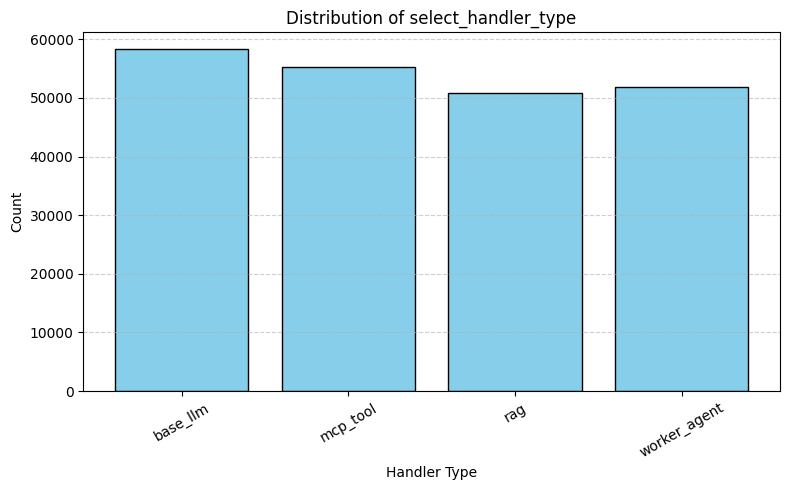

In [3]:
import json
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

jsonl_dir = Path("../dataset/final_dataset") 

handler_type_counter = Counter()

for file in jsonl_dir.rglob("*.jsonl"):
    if ".ipynb_checkpoints" in file.parts:
        continue  

    print(f"📄 Processing: {file}")  

    with file.open("r", encoding="utf-8") as f:
        for line in f:
            try:
                data = json.loads(line)
                handler_type = data.get("output", {}).get("select_handler_type")
                if handler_type:
                    handler_type_counter[handler_type] += 1
            except json.JSONDecodeError:
                print(f"[⚠️] Skipping invalid JSON in file: {file}")

# ✅ Print summary
print("\n✅ Handler Type Counts:")
for handler_type, count in handler_type_counter.items():
    print(f"- {handler_type}: {count}")

# 📊 Plot bar chart
if handler_type_counter:
    labels, values = zip(*handler_type_counter.items())
    plt.figure(figsize=(8, 5))
    plt.bar(labels, values, color="skyblue", edgecolor="black")
    plt.title("Distribution of select_handler_type")
    plt.xlabel("Handler Type")
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("❌ No handler types found.")


### Distribution of confidance level

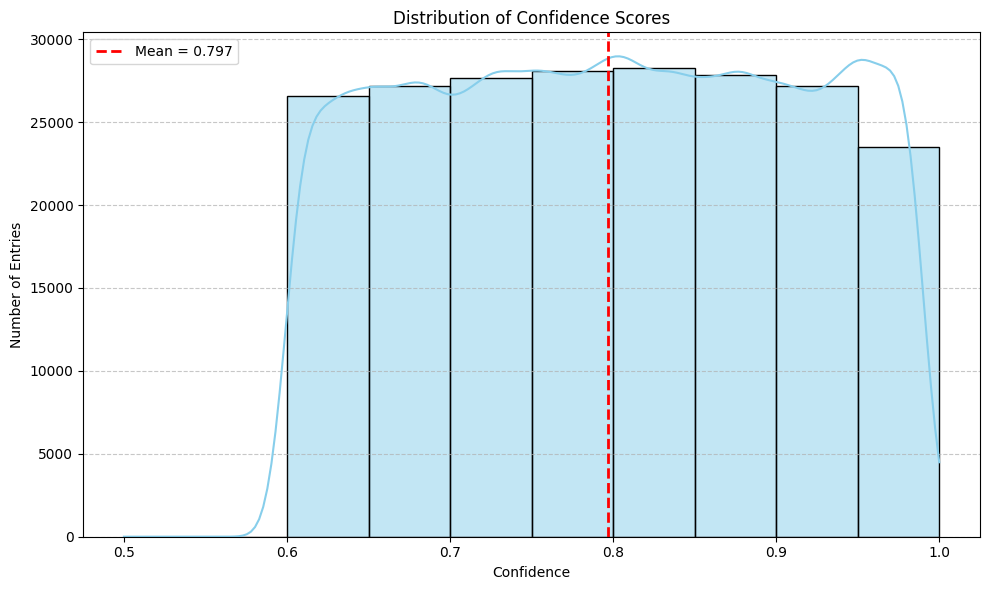

In [4]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Set your dataset directory
jsonl_dir = Path("../dataset/final_dataset")
confidence_scores = []

# 📥 Load confidence scores from all .jsonl files in all subfolders
for file in jsonl_dir.rglob("*.jsonl"):  # 🔁 Recursively search subfolders
    with file.open("r", encoding="utf-8") as f:
        for line in f:
            try:
                data = json.loads(line)
                confidence = data.get("output", {}).get("confidence")
                if isinstance(confidence, (float, int)):
                    confidence_scores.append(confidence)
            except json.JSONDecodeError:
                print(f"[⚠️] Skipping invalid JSON in file: {file}")

# 📊 Plotting
if confidence_scores:
    plt.figure(figsize=(10, 6))
    sns.histplot(confidence_scores, bins=10, kde=True, color="skyblue", edgecolor="black")

    # 🔢 Optional: Add summary statistics
    mean_conf = sum(confidence_scores) / len(confidence_scores)
    plt.axvline(mean_conf, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_conf:.3f}")

    plt.title("Distribution of Confidence Scores")
    plt.xlabel("Confidence")
    plt.ylabel("Number of Entries")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("❌ No confidence scores found.")


### validate the workspace_preference_override logic for base_llm handlers:

In [5]:
import os
import json
from pathlib import Path

def clean_invalid_workspace_entries(dataset_root):
    dataset_path = Path(dataset_root)
    total_valid = 0
    total_invalid = 0

    for file_path in dataset_path.rglob("*.jsonl"):
        temp_lines = []
        valid = 0
        invalid = 0

        with file_path.open('r', encoding='utf-8') as f:
            lines = f.readlines()

        for line_num, line in enumerate(lines, 1):
            line = line.strip()
            if not line:
                continue
            try:
                data = json.loads(line)
            except Exception as e:
                print(f"[{file_path}][Line {line_num}] ❌ Invalid JSON: {e}")
                invalid += 1
                continue  # Skip invalid line

            output = data.get("output", {})
            input_data = data.get("input", {})
            handler_registry = input_data.get("handler_registry", {})
            llm_handlers = handler_registry.get("llm_handlers", [])

            if output.get("select_handler_type") != "base_llm":
                temp_lines.append(line)
                valid += 1
                continue  # Not base_llm — keep the line

            handler_name = output.get("handler_name")
            workspace_override = output.get("workspace_preference_override")

            matched_handler = next((h for h in llm_handlers if h.get("name") == handler_name), None)

            if matched_handler is None:
                print(f"[{file_path}][Line {line_num}] ❌ Handler not found: {handler_name}")
                invalid += 1
                continue  # Skip

            is_workspace_default = matched_handler.get("is_workspace_default", False)
            expected_override = is_workspace_default

            if workspace_override != expected_override:
                print(f"[{file_path}][Line {line_num}] ❌ Mismatch: expected={expected_override}, found={workspace_override}")
                invalid += 1
                continue  # Skip
            else:
                temp_lines.append(line)
                valid += 1

        # Rewrite file with only valid lines
        with file_path.open('w', encoding='utf-8') as f:
            for valid_line in temp_lines:
                f.write(valid_line + "\n")

        print(f"[{file_path}] ✅ Cleaned: {valid} kept, ❌ {invalid} removed")
        total_valid += valid
        total_invalid += invalid

    print(f"\n🧹 Cleaning Complete: Total Valid = {total_valid}, Total Invalid Removed = {total_invalid}")

# Example usage
clean_invalid_workspace_entries("../dataset/final_dataset")


[../dataset/final_dataset/test/final_dataset.jsonl] ✅ Cleaned: 216216 kept, ❌ 0 removed

🧹 Cleaning Complete: Total Valid = 216216, Total Invalid Removed = 0


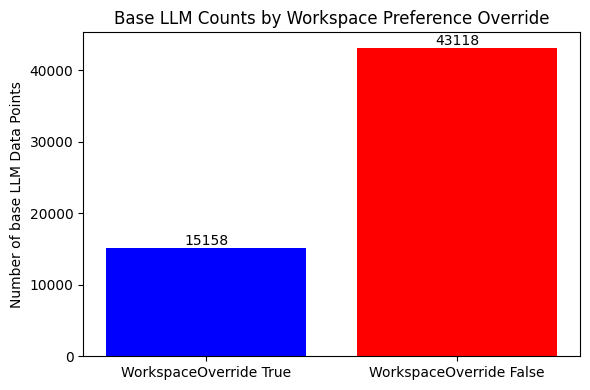

In [6]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt

def plot_base_llm_workspace_override_counts(dataset_path):
    counts = {True: 0, False: 0}
    dataset_path = Path(dataset_path)

    # 🔁 Recursively go through all .jsonl files
    for file_path in dataset_path.rglob("*.jsonl"):
        with file_path.open("r", encoding="utf-8") as f:
            for line in f:
                line = line.strip()
                if not line:
                    continue
                try:
                    data = json.loads(line)
                except json.JSONDecodeError:
                    continue  # Skip invalid JSON

                output = data.get("output", {})
                if output.get("select_handler_type") != "base_llm":
                    continue

                workspace_override = output.get("workspace_preference_override")
                if workspace_override is None:
                    continue

                if workspace_override in counts:
                    counts[workspace_override] += 1

    # 📊 Plot bar graph
    labels = ["WorkspaceOverride True", "WorkspaceOverride False"]
    values = [counts[True], counts[False]]

    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, values, color=["blue", "red"])
    plt.ylabel("Number of base LLM Data Points")
    plt.title("Base LLM Counts by Workspace Preference Override")

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Example usage
plot_base_llm_workspace_override_counts("../dataset/final_dataset")


### Checks if workspace_preference_override is True for non-base_llm — flags as invalid.

In [68]:
import os
import json
from pathlib import Path

def validate_workspace_override_rules(dataset_path):
    valid_count = 0
    invalid_count = 0
    invalid_cases = []

    dataset_path = Path(dataset_path)

    # 🔁 Recursively go through all .jsonl files in subfolders
    for file_path in dataset_path.rglob("*.jsonl"):
        with file_path.open("r", encoding="utf-8") as f:
            for line_num, line in enumerate(f, 1):
                line = line.strip()
                if not line:
                    continue
                try:
                    data = json.loads(line)
                except Exception as e:
                    print(f"[{file_path}][Line {line_num}] ❌ JSON parse error: {e}")
                    invalid_count += 1
                    continue

                output = data.get("output", {})
                selected_handler_type = output.get("select_handler_type")
                workspace_override = output.get("workspace_preference_override")

                # 🚫 Rule: workspace_override == True must only happen for base_llm
                if workspace_override:
                    if selected_handler_type != "base_llm":
                        invalid_count += 1
                        invalid_cases.append({
                            "file": str(file_path),
                            "line": line_num,
                            "selected_handler_type": selected_handler_type,
                            "workspace_preference_override": workspace_override
                        })
                    else:
                        valid_count += 1
                else:
                    valid_count += 1

    print(f"\n✅ Valid cases: {valid_count}")
    print(f"❌ Invalid cases (non-base_llm with override=True): {invalid_count}")

    if invalid_cases:
        print("\nInvalid cases detail:")
        for case in invalid_cases:
            print(case)

# Example usage:
validate_workspace_override_rules("../dataset/batches")



✅ Valid cases: 271999
❌ Invalid cases (non-base_llm with override=True): 0


In [7]:
import json
from pathlib import Path
from collections import defaultdict

def validate_line(data):
    output = data.get("output", {})
    input_data = data.get("input", {})
    handler_type = output.get("select_handler_type")
    handler_name = output.get("handler_name")
    override = output.get("workspace_preference_override")
    registry = input_data.get("handler_registry", {})

    if handler_type == "base_llm":
        llm_handlers = registry.get("llm_handlers", [])
        matched = next((h for h in llm_handlers if h.get("name") == handler_name), None)
        if matched is None:
            return handler_type, False
        is_default = matched.get("is_workspace_default", False)
        return handler_type, (override == is_default)
    else:
        return handler_type, (override is False)

def process_jsonl(file_path, counters):
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            try:
                data = json.loads(line)
                handler_type, is_valid = validate_line(data)
                if is_valid:
                    counters[handler_type]["valid"] += 1
                else:
                    counters[handler_type]["invalid"] += 1
            except json.JSONDecodeError:
                counters["corrupt"]["invalid"] += 1

def summarize_folder(jsonl_root_dir):
    counters = defaultdict(lambda: {"valid": 0, "invalid": 0})
    for path in Path(jsonl_root_dir).rglob("*.jsonl"):
        process_jsonl(path, counters)

    print("\n🔎 Validation Summary:\n")
    for handler_type, counts in counters.items():
        total = counts["valid"] + counts["invalid"]
        print(f"Handler Type: {handler_type}")
        print(f"  ✅ Valid:   {counts['valid']}")
        print(f"  ❌ Invalid: {counts['invalid']}")
        print(f"  📦 Total:   {total}\n")

# Run this with your folder
if __name__ == "__main__":
    summarize_folder("../dataset/batches")



🔎 Validation Summary:

Handler Type: base_llm
  ✅ Valid:   58276
  ❌ Invalid: 0
  📦 Total:   58276

Handler Type: mcp_tool
  ✅ Valid:   55200
  ❌ Invalid: 0
  📦 Total:   55200

Handler Type: rag
  ✅ Valid:   50871
  ❌ Invalid: 0
  📦 Total:   50871

Handler Type: worker_agent
  ✅ Valid:   51869
  ❌ Invalid: 0
  📦 Total:   51869



Counts of valid base LLM entries by workspace_preference_override:
False: 43118
True: 15158


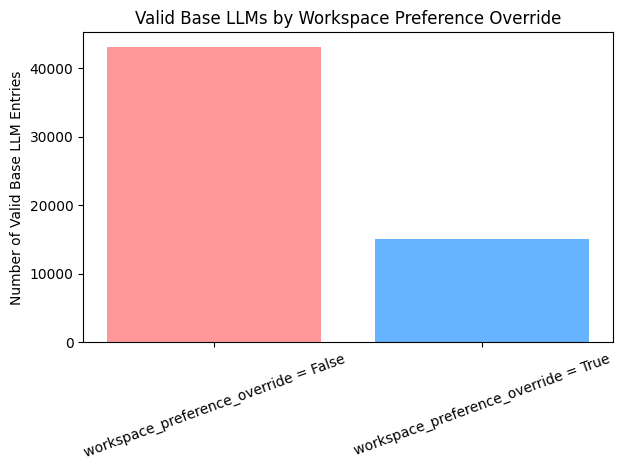

In [8]:
import json
from pathlib import Path
from collections import defaultdict
import matplotlib.pyplot as plt

def validate_and_collect_base_llm(data, counts):
    output = data.get("output", {})
    input_data = data.get("input", {})
    handler_type = output.get("select_handler_type")
    handler_name = output.get("handler_name")
    override = output.get("workspace_preference_override")
    registry = input_data.get("handler_registry", {})

    if handler_type != "base_llm":
        return False  # Only process base_llm here

    llm_handlers = registry.get("llm_handlers", [])
    matched = next((h for h in llm_handlers if h.get("name") == handler_name), None)
    if matched is None:
        return False

    is_default = matched.get("is_workspace_default", False)
    is_valid = (override == is_default)
    if is_valid:
        counts[override] += 1  # Count by True/False override value
    return True

def process_jsonl_for_base_llm(file_path, counts):
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            try:
                data = json.loads(line)
                validate_and_collect_base_llm(data, counts)
            except json.JSONDecodeError:
                pass  # Ignore invalid lines

def plot_base_llm_workspace_override(counts):
    labels = ["workspace_preference_override = False", "workspace_preference_override = True"]
    values = [counts.get(False, 0), counts.get(True, 0)]

    plt.bar(labels, values, color=["#ff9999","#66b3ff"])
    plt.title("Valid Base LLMs by Workspace Preference Override")
    plt.ylabel("Number of Valid Base LLM Entries")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

def main(jsonl_root_dir):
    counts = defaultdict(int)  # key: True or False override, value: count
    for path in Path(jsonl_root_dir).rglob("*.jsonl"):
        process_jsonl_for_base_llm(path, counts)

    print("Counts of valid base LLM entries by workspace_preference_override:")
    print(f"False: {counts.get(False, 0)}")
    print(f"True: {counts.get(True, 0)}")

    plot_base_llm_workspace_override(counts)

if __name__ == "__main__":
    main("../dataset/final_dataset")


### Missing_fields count by handlers (mcp, worker agent)

####  worker agent

In [ ]:
import json
from pathlib import Path

dataset_dir = Path("../dataset/final_dataset")

valid_count = 0
invalid_count = 0
invalid_lines = []

def validate_payload(required_fields, missing_fields, suggested_payload):
    # Stage 1: all missing fields must be in required fields
    if not all(field in required_fields for field in missing_fields):
        return False
    # Stage 2: all required fields are missing → suggested payload should be empty
    if set(missing_fields) == set(required_fields):
        return suggested_payload == {}
    # Stage 3: partial missing → suggested payload should include all required keys
    if not all(field in suggested_payload for field in required_fields):
        return False
    # Check if all missing fields are marked as "missing"
    if not all(suggested_payload.get(field) == "missing" for field in missing_fields):
        return False
    # "summary" must be present in the payload
    if "summary" not in suggested_payload:
        return False
    return True

# Traverse all .jsonl files
for file in dataset_dir.rglob("*.jsonl"):
    with file.open("r", encoding="utf-8") as f:
        for idx, line in enumerate(f, 1):
            try:
                data = json.loads(line)
                input_data = data.get("input", {})
                output_data = data.get("output", {})

                if output_data.get("select_handler_type") != "worker_agent":
                    continue

                handler_name = output_data.get("handler_name")
                missing_fields = output_data.get("missing_fields", [])
                suggested_payload = output_data.get("suggested_payload", {})

                mcp_tools = input_data.get("handler_registry", {}).get("worker_agents", [])
                matched_tool = next((tool for tool in mcp_tools if tool.get("name") == handler_name), None)

                if not matched_tool or not missing_fields:
                    continue

                required_fields = matched_tool.get("payload_schema", {}).get("required", [])

                if validate_payload(required_fields, missing_fields, suggested_payload):
                    valid_count += 1
                else:
                    invalid_count += 1
                    invalid_lines.append(f"{file.name} (line {idx})")
                    # print(f"\n❌ Invalid entry in {file.name} (line {idx}):")
                    # print(json.dumps(data, indent=2))

            except Exception as e:
                continue
# Final summary
print("\n========= ✅ Evaluation Summary =========")
print(f"✅ Valid entries:   {valid_count}")
print(f"❌ Invalid entries: {invalid_count}")
if invalid_lines:
    print("❌ Invalid entry locations:")
    print(f"\n📌 Total invalid line entries: {len(invalid_lines)}")

#### mcp_tool

In [ ]:
import json
from pathlib import Path

dataset_dir = Path("../dataset/batches")

valid_count = 0
invalid_count = 0
invalid_records = []

for jsonl_file in dataset_dir.rglob("*.jsonl"):
    with open(jsonl_file, "r", encoding="utf-8") as f:
        for line_num, line in enumerate(f, start=1):
            try:
                data = json.loads(line)
                input_section = data.get("input", {})
                output_section = data.get("output", {})

                # Filter for mcp_tool type
                if output_section.get("select_handler_type") == "mcp_tool":
                    handler_name = output_section.get("handler_name")
                    mcp_tools = input_section.get("handler_registry", {}).get("mcp_tools", [])
                    matching_tool = next((tool for tool in mcp_tools if tool.get("name") == handler_name), None)

                    if not matching_tool:
                        continue  # Skip if tool not found

                    required_fields = matching_tool.get("input_schema", {}).get("required", [])
                    missinginfo = output_section.get("missinginfo", [])
                    suggested_payload = output_section.get("suggested_payload", {})

                    # If no missing info, validate that all required fields are in suggested_payload
                    if not missinginfo:
                        missing_required_fields = [field for field in required_fields if field not in suggested_payload]

                        if not missing_required_fields:
                            valid_count += 1
                        else:

                            invalid_count += 1
                            invalid_records.append({
                                "file": str(jsonl_file),
                                "line": line_num,
                                "handler_name": handler_name,
                                "required_fields": required_fields,
                                "missing_fields": missing_required_fields
                            })

            except json.JSONDecodeError:
                print(f"[ERROR] Invalid JSON in file: {jsonl_file}")

# Summary
print(f"\n✅ Total Valid Records: {valid_count}")
print(f"❌ Total Invalid Records: {invalid_count}\n")

# Print invalid record details
for record in invalid_records:
    print(f"[{record['file']}][Line {record['line']}] Handler: {record['handler_name']}")
    print(f"📌 Required Fields           : {record['required_fields']}")
    print(f"❌ Missing in Suggested Payload: {record['missinsg_fields']}")
    print("-" * 60)


In [ ]:
import json
from pathlib import Path

dataset_dir = Path("../dataset/batches")
invalid_path = Path("invalid.jsonl")

valid_count = 0
invalid_count = 0
invalid_records = []

# Open invalid.jsonl in write mode once
with invalid_path.open("w", encoding="utf-8") as invalid_file:
    for jsonl_file in dataset_dir.rglob("*.jsonl"):
        with jsonl_file.open("r", encoding="utf-8") as f:
            for line_num, line in enumerate(f, start=1):
                try:
                    data = json.loads(line)
                    input_section = data.get("input", {})
                    output_section = data.get("output", {})

                    # Only process mcp_tool records
                    if output_section.get("select_handler_type") == "mcp_tool":
                        handler_name = output_section.get("handler_name")
                        mcp_tools = input_section.get("handler_registry", {}).get("mcp_tools", [])
                        matching_tool = next(
                            (tool for tool in mcp_tools if tool.get("name") == handler_name),
                            None
                        )

                        if not matching_tool:
                            continue  # Skip if tool not found

                        required_fields = matching_tool.get("input_schema", {}).get("required", [])
                        missinginfo = output_section.get("missinginfo", [])
                        suggested_payload = output_section.get("suggested_payload", {})

                        if not missinginfo:
                            missing_required_fields = [
                                field for field in required_fields
                                if field not in suggested_payload
                            ]

                            if not missing_required_fields:
                                valid_count += 1
                            else:
                                invalid_count += 1
                                record = {
                                    "file": str(jsonl_file),
                                    "line": line_num,
                                    "handler_name": handler_name,
                                    "required_fields": required_fields,
                                    "missing_fields": missing_required_fields,
                                    "record": data
                                }
                                invalid_records.append(record)
                                # Write the invalid record as JSON line
                                invalid_file.write(json.dumps(record) + "\n")

                except json.JSONDecodeError:
                    print(f"[ERROR] Invalid JSON in file: {jsonl_file} at line {line_num}")

# Summary log
print(f"\n✅ Total Valid Records: {valid_count}")
print(f"❌ Total Invalid Records: {invalid_count}\n")

# Print summary details for invalid records
for rec in invalid_records:
    print(f"[{rec['file']}] Line {rec['line']} — Handler: {rec['handler_name']}")
    print(f" Required Fields : {rec['required_fields']}")
    print(f" Missing Fields  : {rec['missing_fields']}")
    print("-" * 60)


### Distribution of empty and non-empty missing fields

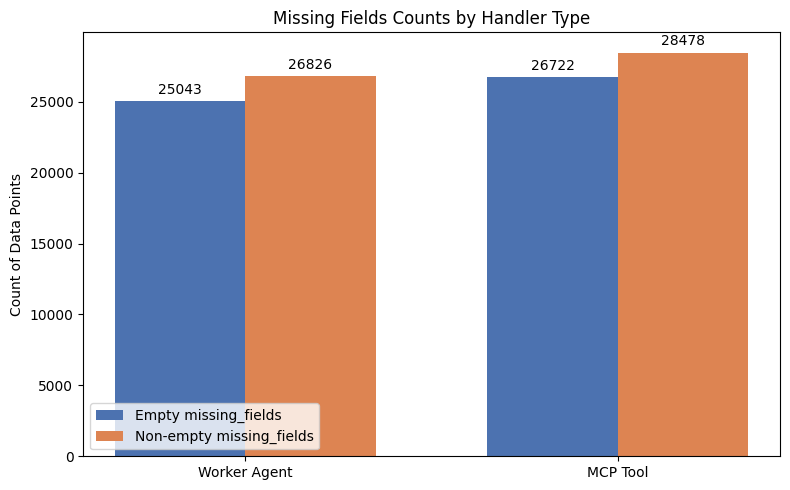

In [9]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def count_missing_fields_worker_mcp(dataset_path):
    counts = {
        "worker_agent": {"empty": 0, "non_empty": 0},
        "mcp_tool": {"empty": 0, "non_empty": 0}
    }

    for root, _, files in os.walk(dataset_path):
        for file_name in files:
            if not file_name.endswith(".jsonl"):
                continue

            file_path = os.path.join(root, file_name)
            with open(file_path, 'r') as f:
                for line in f:
                    line = line.strip()
                    if not line:
                        continue
                    try:
                        data = json.loads(line)
                    except json.JSONDecodeError:
                        continue

                    output = data.get("output", {})
                    select_handler_type = output.get("select_handler_type")
                    missing_fields = output.get("missing_fields", [])

                    if missing_fields is None:
                        missing_fields = []

                    if select_handler_type == "worker_agent":
                        if len(missing_fields) == 0:
                            counts["worker_agent"]["empty"] += 1
                        else:
                            counts["worker_agent"]["non_empty"] += 1
                    elif select_handler_type == "mcp_tool":
                        if len(missing_fields) == 0:
                            counts["mcp_tool"]["empty"] += 1
                        else:
                            counts["mcp_tool"]["non_empty"] += 1

    # Plotting
    categories = ['Empty missing_fields', 'Non-empty missing_fields']
    worker_vals = [counts["worker_agent"]["empty"], counts["worker_agent"]["non_empty"]]
    mcp_vals = [counts["mcp_tool"]["empty"], counts["mcp_tool"]["non_empty"]]

    x = np.arange(2)  
    width = 0.35 

    fig, ax = plt.subplots(figsize=(8, 5))

    bar_empty = ax.bar(x - width/2, [worker_vals[0], mcp_vals[0]], width, label='Empty missing_fields', color='#4c72b0')
    bar_non_empty = ax.bar(x + width/2, [worker_vals[1], mcp_vals[1]], width, label='Non-empty missing_fields', color='#dd8452')

    ax.set_xticks(x)
    ax.set_xticklabels(['Worker Agent', 'MCP Tool'])
    ax.set_ylabel('Count of Data Points')
    ax.set_title('Missing Fields Counts by Handler Type')
    ax.legend()

    for bars in [bar_empty, bar_non_empty]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height}',
                        xy=(bar.get_x() + bar.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords='offset points',
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Example usage:
count_missing_fields_worker_mcp("../dataset/final_dataset")
